In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "hr-analytics-dataset"

R aids HR professionals in analyzing employee performance, predicting attrition and improving workforce management. By analyzing HR data, companies can optimize talent retention and identify areas for improvement.

# Human Resource Management Analytics Dashboard in R

Human Resource Management plays an important role in any organization and business to evaluate the company's growth and performance based on its employees. This helps in analyzing the human assets working in a company and how they can be motivated to do better by different means. Human Resource Management helps in deriving useful information from employee data to make the working environment better and more efficient.

# Project Overview
There are various needs for having HRM in a company:

* Talent Acquisition and Retention: HR Management helps in keeping good talent in the company.
* Employee Development: Focuses on continuous employee training and development, enhancing skills and career growth.
* Performance Management: Implements performance appraisal systems to evaluate and improve employee productivity.
* Workplace Culture: Fosters a positive work environment, improving employee satisfaction and engagement, which helps them grow and increases productivity.
* Compensation and Benefits: Designs competitive compensation packages to attract and retain top talent.

1. Load libraries and the Dataset
* Replace the path of the dataset with the original one. We are using multiple libraries for our dashboard.

Dataset: Human Resource Management Analytics

This dataset contains 1480 observations and 38 variables, representing various employee attributes and metrics.

In [2]:
library(dplyr)
library(ggplot2)
library(lubridate)

data <- read.csv("/kaggle/input/hr-analytics-dataset/HR_Analytics.csv")
head(data)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,⋯,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,⋯,3,80,0,0,2,3,0,0,0,0
2,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,⋯,1,80,0,0,2,3,0,0,0,0
3,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,⋯,4,80,0,0,3,3,0,0,0,0
4,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,⋯,4,80,0,0,2,3,0,0,0,0
5,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,⋯,4,80,0,0,0,3,0,0,0,0
6,RM973,18,18-25,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,⋯,3,80,0,0,5,4,0,0,0,0


2. Data Preprocessing
* Data preprocessing is a crucial step to ensure the data is clean and ready for analysis. Here, we will handle missing values, convert data types and create new variables as needed.

In [3]:
sum(is.na(data))

if (sum(is.na(data)) > 0) {
  data <- na.omit(data)
}

[1] 57

3. Exploratory Data Analysis (EDA)
* This step is important to identify and explore the dataset so that we can analyze it and make informed decisions. Here, we will create multiple such visualization to understand better.

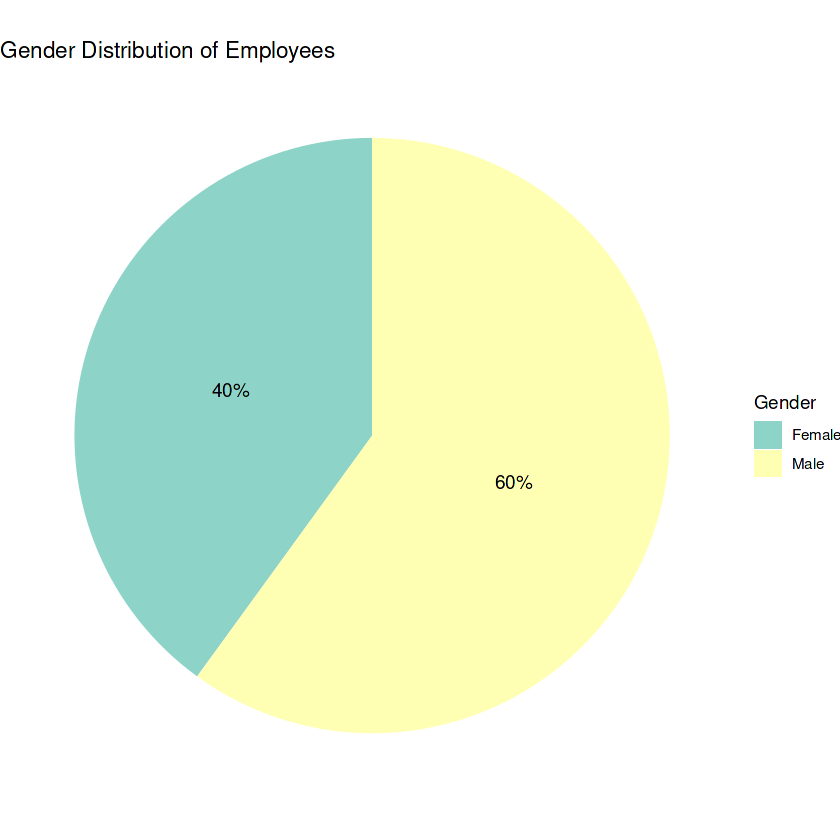

In [4]:
gender_distribution <- data %>%
  group_by(Gender) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(Count / sum(Count) * 100, 1))

ggplot(gender_distribution, aes(x = "", y = Percentage, fill = Gender)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start = 0) +
  theme_void() +
  geom_text(aes(label = paste0(Percentage, "%")), 
            position = position_stack(vjust = 0.5)) +
  labs(title = "Gender Distribution of Employees") +
  scale_fill_brewer(palette = "Set3")

This pie chart indicates that the total employees of the given company has 60% male employees and 40% female.

3.1. Education Level of Employees
* Now we will visualize the Education Level of Employees.

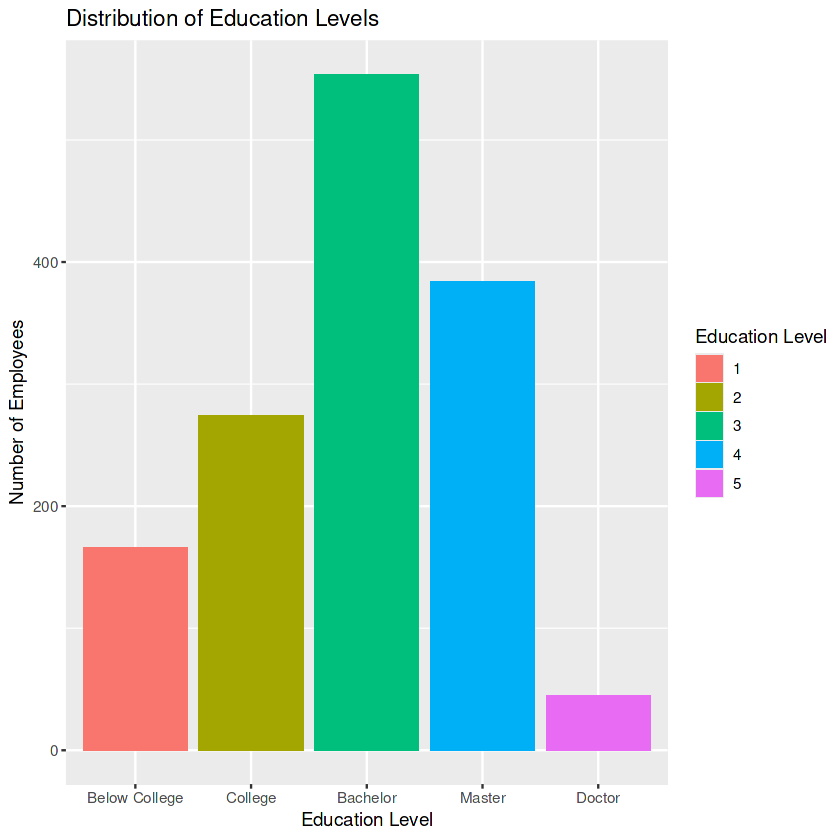

In [5]:
ggplot(data, aes(x = factor(Education, levels = c(1, 2, 3, 4, 5)), 
                 fill = factor(Education))) +
  geom_bar() +
  labs(title = "Distribution of Education Levels",
       x = "Education Level",
       y = "Number of Employees",
       fill = "Education Level") +
  scale_x_discrete(labels = c("1" = "Below College", "2" = "College", "3" = "Bachelor",
                              "4" = "Master", "5" = "Doctor"))

3.2. Employee Age distribution
* This will give us insights into the age group of the employees.

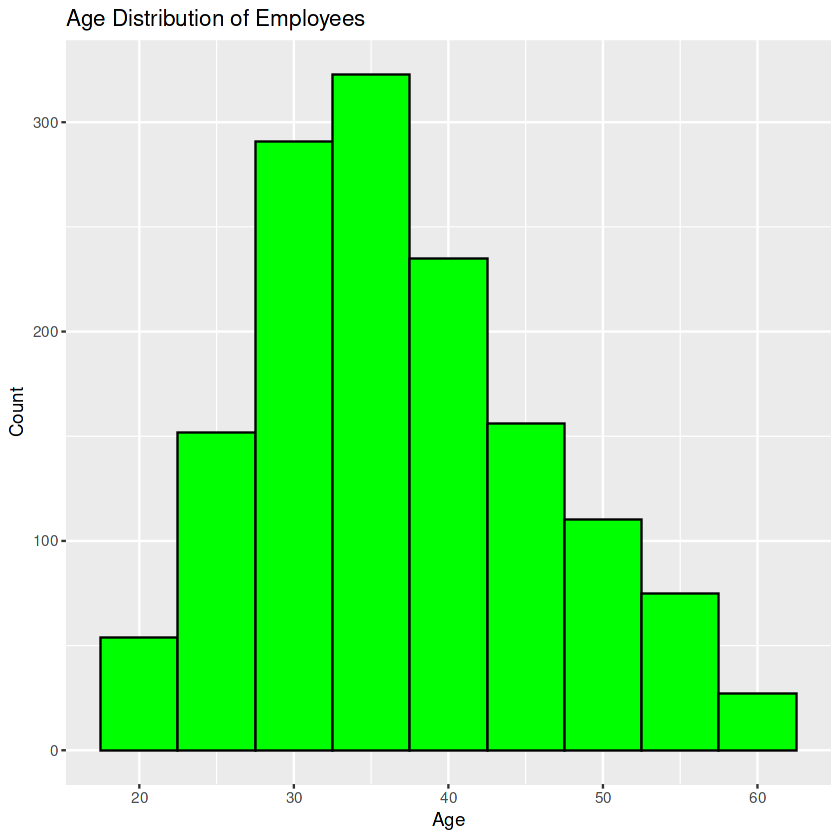

In [6]:
ggplot(data, aes(x = Age)) +
  geom_histogram(binwidth = 5, fill = "green", color = "black") +
  labs(title = "Age Distribution of Employees",
       x = "Age",
       y = "Count")

As we can see that the age group from 30-40 have the highest number of employees.

3.3. Job Role Distribution
* This explains us the kind of jobs provided and the number of employees in the certain sector.

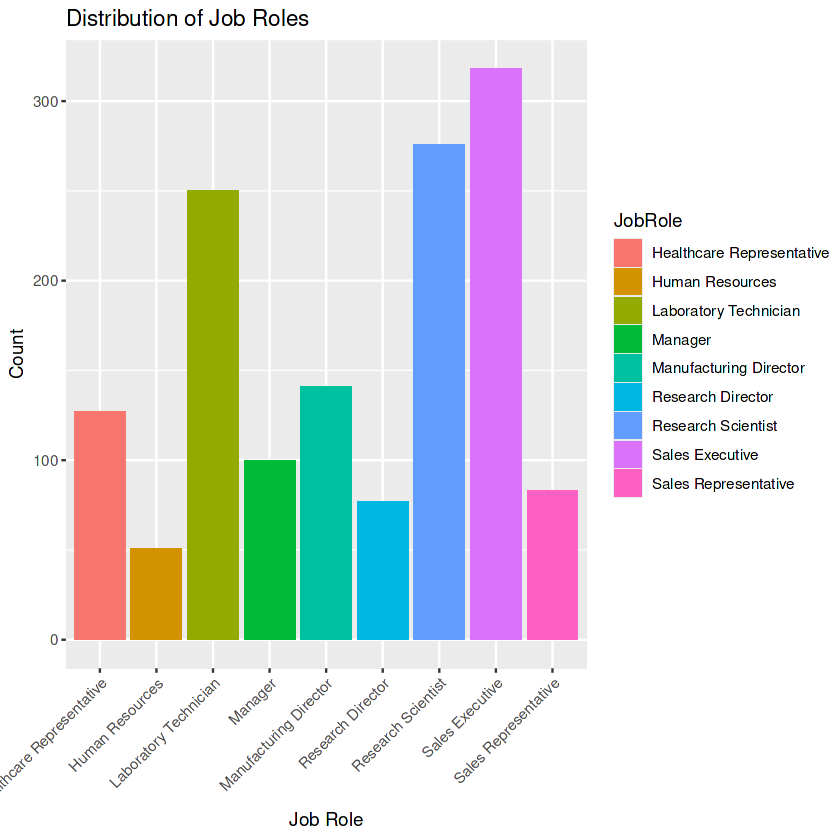

In [7]:
ggplot(data, aes(x = JobRole, fill = JobRole)) +
  geom_bar() +
  labs(title = "Distribution of Job Roles",
       x = "Job Role",
       y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

The highest number of job roles in the company is sales executive.

3.4. Monthly Income Distribution
* This helps us analyze the income of the employees.

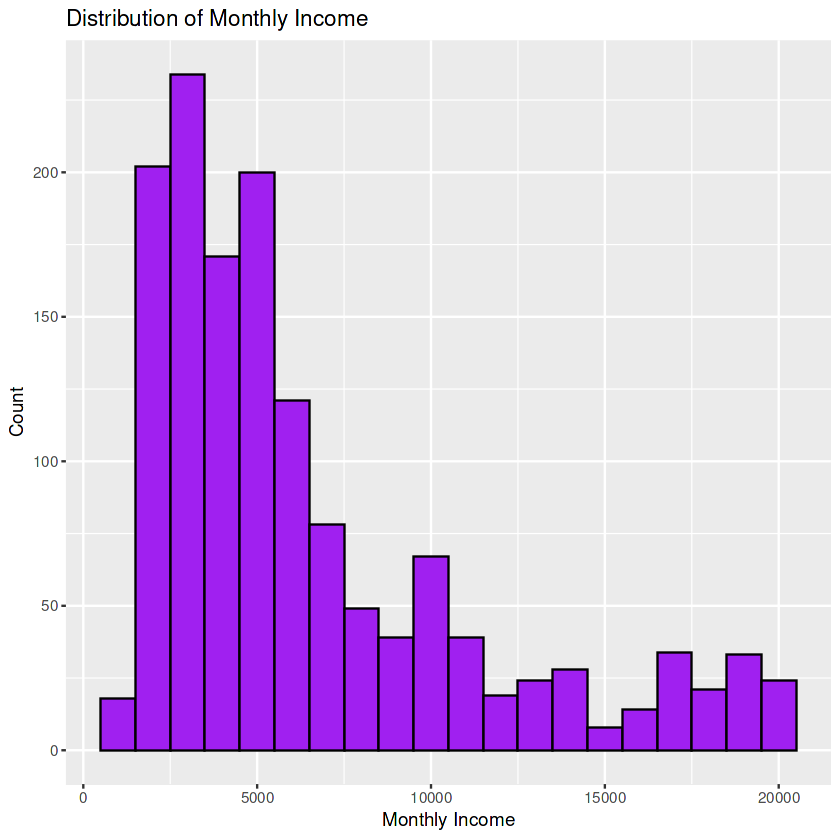

In [8]:
ggplot(data, aes(x = MonthlyIncome)) +
  geom_histogram(binwidth = 1000, fill = "purple", color = "black") +
  labs(title = "Distribution of Monthly Income",
       x = "Monthly Income",
       y = "Count")

3.5. Department-wise Gender Distribution
* This plot will help us estimate the gender ratio in the company for better hiring to maintain equality and diversity.

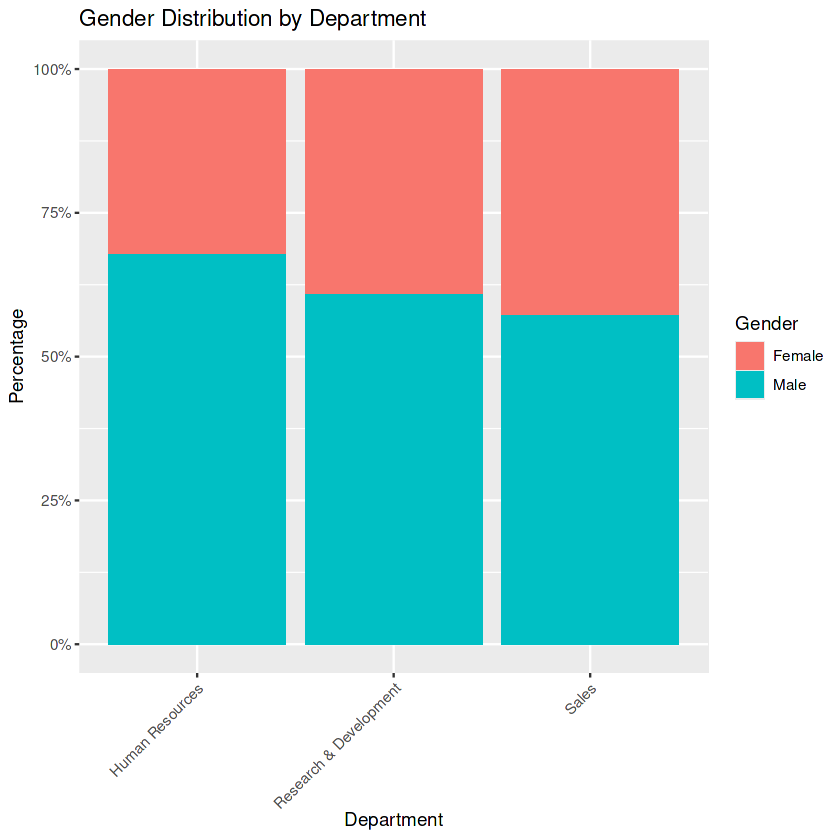

In [9]:
ggplot(data, aes(x = Department, fill = Gender)) +
  geom_bar(position = "fill") +
  scale_y_continuous(labels = scales::percent) +
  labs(title = "Gender Distribution by Department",
       x = "Department",
       y = "Percentage",
       fill = "Gender") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

As we can see, the least number of female employees is in the Human Resources department.

# Dashboard Analysis for HR Management
* A well-designed HR Management Analytics Dashboard provides important insights into various aspects of the workforce, enabling better management and strategic planning.

1. Department-Based Dashboard for overview
* Here we will build a dashboard which will help us navigate through different departments and get all the necessary insights related to, including an overview, employee engagement, and attrition analysis.

In [17]:
library(shiny)
library(ggplot2)
library(shinydashboard)


ui <- fluidPage(
  titlePanel("HR Management Analytics Dashboard"),
  sidebarLayout(
    sidebarPanel(
      selectInput("department", "Select Department:", 
                  choices = unique(data$Department))
    ),
    mainPanel(
      tabsetPanel(
        tabPanel("Overview", 
                 fluidRow(
                   valueBoxOutput("total_employees"),
                   valueBoxOutput("avg_salary"),
                   valueBoxOutput("avg_age")
                 ),
                 plotOutput("gender_distribution"),
                 plotOutput("age_distribution"),
                 plotOutput("education_distribution"),
                 plotOutput("attrition_by_dept"),
                 plotOutput("job_satisfaction"),
                 plotOutput("performance_ratings"),
                 plotOutput("training_times")
        ),
        tabPanel("Employee Engagement", 
                 plotOutput("engagement_by_dept"),
                 plotOutput("years_with_manager"),
                 plotOutput("work_life_balance")
        ),
        tabPanel("Attrition Analysis", 
                 plotOutput("attrition_by_age"),
                 plotOutput("attrition_by_job_role"),
                 plotOutput("attrition_by_gender")
        )
      )
    )
  )
)

server <- function(input, output) {
  filtered_data <- reactive({
    data[data$Department == input$department, ]
  })
  
  output$total_employees <- renderValueBox({
    valueBox(
      nrow(filtered_data()), "Total Employees", icon = icon("users"),
      color = "blue"
    )
  })
  
  output$avg_salary <- renderValueBox({
    avg_salary <- round(mean(filtered_data()$MonthlyIncome), 2)
    valueBox(
      avg_salary, "Average Salary", icon = icon("dollar-sign"),
      color = "green"
    )
  })
  
  output$avg_age <- renderValueBox({
    avg_age <- round(mean(filtered_data()$Age), 2)
    valueBox(
      avg_age, "Average Age", icon = icon("calendar-alt"),
      color = "purple"
    )
  })
  
  output$gender_distribution <- renderPlot({
    gender_dist <- table(filtered_data()$Gender)
    pie(gender_dist, main="Gender Distribution", 
        col=c("pink", "lightblue"), labels=paste0(names(gender_dist), "\n", 
                                    round(prop.table(gender_dist)*100, 2), "%"))
  })
  
  output$age_distribution <- renderPlot({
    ggplot(filtered_data(), aes(x=Age)) + 
      geom_histogram(binwidth=5, fill="blue", color="black") +
      labs(title="Age Distribution", x="Age", y="Count")
  })
  
  output$education_distribution <- renderPlot({
    ggplot(filtered_data(), aes(x=EducationField)) + 
      geom_bar(fill="orange", color="black") +
      labs(title="Education Distribution", x="Education Field", y="Count")
  })
  
  output$attrition_by_dept <- renderPlot({
    ggplot(filtered_data(), aes(x=Department, fill=Attrition)) + 
      geom_bar(position="fill") +
      labs(title="Attrition by Department", x="Department", y="Proportion")
  })
  
  output$job_satisfaction <- renderPlot({
    ggplot(filtered_data(), aes(x=JobSatisfaction)) + 
      geom_bar(fill="green", color="black") +
      labs(title="Job Satisfaction Levels", x="Job Satisfaction", y="Count")
  })
  
  output$performance_ratings <- renderPlot({
    ggplot(filtered_data(), aes(x=PerformanceRating)) + 
      geom_bar(fill="purple", color="black") +
      labs(title="Performance Ratings Distribution", x="Performance Rating", y="Count")
  })
  
  output$training_times <- renderPlot({
    ggplot(filtered_data(), aes(x=TrainingTimesLastYear)) + 
      geom_bar(fill="orange", color="black") +
      labs(title="Training Times Last Year", x="Training Times", y="Count")
  })
  
  output$engagement_by_dept <- renderPlot({
    ggplot(filtered_data(), aes(x=Department, y=JobInvolvement)) + 
      geom_boxplot(fill="lightblue", color="black") +
      labs(title="Employee Engagement by Department", x="Department", y="Job Involvement")
  })
  
  output$years_with_manager <- renderPlot({
    ggplot(filtered_data(), aes(x=YearsWithCurrManager)) + 
      geom_histogram(binwidth=1, fill="lightgreen", color="black") +
      labs(title="Years with Current Manager", x="Years", y="Count")
  })
  
  output$work_life_balance <- renderPlot({
    ggplot(filtered_data(), aes(x=WorkLifeBalance)) + 
      geom_bar(fill="lightcoral", color="black") +
      labs(title="Work-Life Balance", x="Work-Life Balance", y="Count")
  })
  
  output$attrition_by_age <- renderPlot({
    ggplot(filtered_data(), aes(x=Age, fill=Attrition)) + 
      geom_histogram(binwidth=5, position="dodge") +
      labs(title="Attrition by Age", x="Age", y="Count")
  })
  
  output$attrition_by_job_role <- renderPlot({
    ggplot(filtered_data(), aes(x=JobRole, fill=Attrition)) + 
      geom_bar(position="fill") +
      labs(title="Attrition by Job Role", x="Job Role", y="Proportion")
  })
  
  output$attrition_by_gender <- renderPlot({
    ggplot(filtered_data(), aes(x=Gender, fill=Attrition)) + 
      geom_bar(position="fill") +
      labs(title="Attrition by Gender", x="Gender", y="Proportion")
  })
}

shinyApp(ui, server)


Listening on http://127.0.0.1:5338



In [ ]:
# HR Analytics Dashboard with Prediction

library(shiny)
library(shinydashboard)
library(ggplot2)
library(dplyr)
library(caret)

# ----------------------------
# Load Data Globally
# ----------------------------


# Prepare model data
model_data <- data %>% 
  select(Attrition, Age, MonthlyIncome, JobLevel, DistanceFromHome, YearsAtCompany)

# Convert Attrition to factor
model_data$Attrition <- as.factor(model_data$Attrition)

# Train-test split
set.seed(123)
trainIndex <- createDataPartition(model_data$Attrition, p = 0.8, list = FALSE)
train_data <- model_data[trainIndex, ]
test_data <- model_data[-trainIndex, ]

# Train logistic regression
log_model <- train(
  Attrition ~ Age + MonthlyIncome + JobLevel + DistanceFromHome + YearsAtCompany,
  data = train_data,
  method = "glm",
  family = "binomial"
)

# ----------------------------
# UI
# ----------------------------
ui <- dashboardPage(
  dashboardHeader(title = "HR Analytics Dashboard"),
  dashboardSidebar(
    sidebarMenu(
      menuItem("Overview", tabName = "overview", icon = icon("dashboard")),
      menuItem("Visualizations", tabName = "visualizations", icon = icon("chart-bar")),
      menuItem("Attrition Prediction", tabName = "prediction", icon = icon("robot"))
    ),
    selectInput("department", "Select Department:", 
                choices = unique(data$Department), 
                selected = unique(data$Department)[1])
  ),
  dashboardBody(
    tabItems(
      # ----------------------------
      # Overview
      # ----------------------------
      tabItem(tabName = "overview",
              fluidRow(
                valueBoxOutput("total_employees"),
                valueBoxOutput("avg_salary"),
                valueBoxOutput("avg_age")
              )
      ),
      
      # ----------------------------
      # Visualizations
      # ----------------------------
      tabItem(tabName = "visualizations",
              fluidRow(
                box(width = 6, title = "Education Distribution", solidHeader = TRUE, status = "primary",
                    plotOutput("education_distribution")),
                box(width = 6, title = "Attrition by Job Role", solidHeader = TRUE, status = "warning",
                    plotOutput("attrition_by_role"))
              )
      ),
      
      # ----------------------------
      # Prediction
      # ----------------------------
      tabItem(tabName = "prediction",
              fluidRow(
                box(width = 6, title = "Input Employee Details", solidHeader = TRUE, status = "info",
                    numericInput("age", "Age:", value = 30, min = 18, max = 60),
                    numericInput("income", "Monthly Income:", value = 5000, min = 1000, max = 50000),
                    numericInput("joblevel", "Job Level:", value = 2, min = 1, max = 5),
                    numericInput("distance", "Distance From Home:", value = 5, min = 1, max = 50),
                    numericInput("years", "Years at Company:", value = 3, min = 0, max = 40),
                    actionButton("predict_btn", "Predict Attrition", icon = icon("play"), class = "btn-success")
                ),
                box(width = 6, title = "Prediction Result", solidHeader = TRUE, status = "success",
                    verbatimTextOutput("prediction_result"))
              )
      )
    )
  )
)

# ----------------------------
# Server
# ----------------------------
server <- function(input, output, session) {
  
  # Cached filtered data
  filtered_data <- reactive({
    req(input$department)
    data %>% filter(Department == input$department)
  }) %>% bindCache(input$department)
  
  # Summary stats
  summary_data <- reactive({
    df <- filtered_data()
    list(
      total = nrow(df),
      avg_salary = round(mean(df$MonthlyIncome, na.rm = TRUE), 2),
      avg_age = round(mean(df$Age, na.rm = TRUE), 2)
    )
  }) %>% bindCache(input$department)
  
  # Value Boxes
  output$total_employees <- renderValueBox({
    valueBox(summary_data()$total, "Total Employees", icon = icon("users"), color = "blue")
  })
  
  output$avg_salary <- renderValueBox({
    valueBox(summary_data()$avg_salary, "Average Salary", icon = icon("dollar-sign"), color = "green")
  })
  
  output$avg_age <- renderValueBox({
    valueBox(summary_data()$avg_age, "Average Age", icon = icon("user"), color = "purple")
  })
  
  # Education Distribution
  output$education_distribution <- renderPlot({
    edu_summary <- filtered_data() %>% count(EducationField)
    
    ggplot(edu_summary, aes(x = EducationField, y = n, fill = EducationField)) +
      geom_col(show.legend = FALSE) +
      labs(title = "Education Distribution", x = "Education Field", y = "Count") +
      theme_minimal()
  })
  
  # Attrition by Job Role
  output$attrition_by_role <- renderPlot({
    role_summary <- filtered_data() %>%
      group_by(JobRole, Attrition) %>%
      summarise(Count = n(), .groups = 'drop')
    
    ggplot(role_summary, aes(x = JobRole, y = Count, fill = Attrition)) +
      geom_col(position = "dodge") +
      labs(title = "Attrition by Job Role", x = "Job Role", y = "Count") +
      theme_minimal() +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  })
  
  # Prediction
  observeEvent(input$predict_btn, {
    new_data <- data.frame(
      Age = input$age,
      MonthlyIncome = input$income,
      JobLevel = input$joblevel,
      DistanceFromHome = input$distance,
      YearsAtCompany = input$years
    )
    
    prediction <- predict(log_model, new_data)
    
    output$prediction_result <- renderText({
      paste("Predicted Attrition: ", as.character(prediction))
    })
  })
}

# ----------------------------
# Run App
# ----------------------------
shinyApp(ui, server)


Here we can navigate and find different insights on the particular department. With the help of the toggle bar we can select the department we want.

2. Employee analysis based on the department and time
* The UI layout consists of a title, a sidebar for navigation and a main panel for displaying the plots and metrics. The sidebar allows navigation through different departments and time periods.

In [ ]:
library(shiny)
library(ggplot2)
library(dplyr)

# Load your dataset
# data <- read.csv("path_to_your_dataset.csv")

ui <- fluidPage(
  titlePanel("HR Management Analytics Dashboard"),
  sidebarLayout(
    sidebarPanel(
      selectInput("department", "Select Department:", 
                  choices = unique(data$Department)),
      selectInput("time_period", "Select Time Period:", 
                  choices = c("Last Month", "Last Quarter", "Last Year"))
    ),
    mainPanel(
      tabsetPanel(
        tabPanel("Overview", 
                 fluidRow(
                   valueBoxOutput("total_employees"),
                   valueBoxOutput("avg_salary"),
                   valueBoxOutput("avg_age")
                 ),
                 fluidRow(
                   valueBoxOutput("gender_distribution"),
                   valueBoxOutput("marital_status_distribution"),
                   valueBoxOutput("job_level_distribution")
                 ),
                 plotOutput("age_distribution"),
                 plotOutput("experience_distribution")
        ),
        tabPanel("Performance", 
                 plotOutput("performance_by_department"),
                 plotOutput("performance_by_age"),
                 plotOutput("performance_by_experience")
        ),
        tabPanel("Engagement", 
                 plotOutput("engagement_by_gender"),
                 plotOutput("engagement_by_marital_status"),
                 plotOutput("engagement_by_job_level")
        ),
        tabPanel("Attrition", 
                 plotOutput("attrition_by_age"),
                 plotOutput("attrition_by_department"),
                 plotOutput("attrition_by_experience")
        )
      )
    )
  )
)

server <- function(input, output) {
  filtered_data <- reactive({
    data %>% filter(Department == input$department)
  })
  
  output$total_employees <- renderValueBox({
    valueBox(
      nrow(filtered_data()), "Total Employees", icon = icon("users"),
      color = "blue"
    )
  })
  
  output$avg_salary <- renderValueBox({
    avg_salary <- round(mean(filtered_data()$Salary), 2)
    valueBox(
      avg_salary, "Avg Salary", icon = icon("dollar-sign"),
      color = "green"
    )
  })
  
  output$avg_age <- renderValueBox({
    avg_age <- round(mean(filtered_data()$Age), 2)
    valueBox(
      avg_age, "Avg Age", icon = icon("calendar"),
      color = "purple"
    )
  })
  
  output$gender_distribution <- renderPlot({
    ggplot(filtered_data(), aes(x = "", fill = Gender)) +
      geom_bar(width = 1) +
      coord_polar(theta = "y") +
      labs(title = "Gender Distribution", x = "", y = "") +
      scale_fill_manual(values = c("Male" = "blue", "Female" = "pink")) +
      theme_void() +
      geom_text(aes(label = paste0(round((..count..)/sum(..count..)*100), "%")),
                stat = "count", position = position_stack(vjust = 0.5))
  })
  
  output$marital_status_distribution <- renderPlot({
    ggplot(filtered_data(), aes(x = MaritalStatus, fill = MaritalStatus)) +
      geom_bar() +
      labs(title = "Marital Status Distribution", x = "Marital Status", y = "Count") +
      scale_fill_manual(values = c("Single" = "red", "Married" = "green", 
                                   "Divorced" = "orange"))
  })
  
  output$job_level_distribution <- renderPlot({
    ggplot(filtered_data(), aes(x = JobLevel, fill = JobLevel)) +
      geom_bar() +
      labs(title = "Job Level Distribution", x = "Job Level", y = "Count")
  })
  
  output$age_distribution <- renderPlot({
    ggplot(filtered_data(), aes(x = Age)) +
      geom_histogram(binwidth = 1, fill = "blue", color = "black") +
      labs(title = "Age Distribution", x = "Age", y = "Count")
  })
  
  output$experience_distribution <- renderPlot({
    ggplot(filtered_data(), aes(x = TotalWorkingYears)) +
      geom_histogram(binwidth = 1, fill = "green", color = "black") +
      labs(title = "Total Working Years Distribution", x = "Total Working Years", 
                                                                    y = "Count")
  })
  
  output$performance_by_department <- renderPlot({
    ggplot(filtered_data(), aes(x = Department, y = PerformanceRating, fill = Department)) +
      geom_boxplot() +
      labs(title = "Performance by Department", x = "Department", 
            y = "Performance Rating")
  })
  
  output$performance_by_age <- renderPlot({
    ggplot(filtered_data(), aes(x = Age, y = PerformanceRating)) +
      geom_point(color = "blue") +
      labs(title = "Performance by Age", x = "Age", y = "Performance Rating")
  })
  
  output$performance_by_experience <- renderPlot({
    ggplot(filtered_data(), aes(x = TotalWorkingYears, y = PerformanceRating)) +
      geom_point(color = "green") +
      labs(title = "Performance by Experience", x = "Total Working Years", 
           y = "Performance Rating")
  })
  
  output$engagement_by_gender <- renderPlot({
    ggplot(filtered_data(), aes(x = Gender, y = JobInvolvement, fill = Gender)) +
      geom_boxplot() +
      labs(title = "Engagement by Gender", x = "Gender", y = "Engagement Score")
  })
  
  output$engagement_by_marital_status <- renderPlot({
    ggplot(filtered_data(), aes(x = MaritalStatus, y = JobInvolvement,
                                fill = MaritalStatus)) +
      geom_boxplot() +
      labs(title = "Engagement by Marital Status", x = "Marital Status", 
           y = "Engagement Score")
  })
  
  output$engagement_by_job_level <- renderPlot({
    ggplot(filtered_data(), aes(x = JobLevel, y = JobInvolvement, fill = JobLevel)) +
      geom_boxplot() +
      labs(title = "Engagement by Job Level", x = "Job Level", y = "Engagement Score")
  })
  
  output$attrition_by_age <- renderPlot({
    ggplot(filtered_data(), aes(x = Age, y = Attrition, fill = Attrition)) +
      geom_bar(stat = "identity") +
      labs(title = "Attrition by Age", x = "Age", y = "Attrition")
  })
  
  output$attrition_by_department <- renderPlot({
    ggplot(filtered_data(), aes(x = Department, y = Attrition, fill = Department)) +
      geom_bar(stat = "identity") +
      labs(title = "Attrition by Department", x = "Department", y = "Attrition")
  })
  
  output$attrition_by_experience <- renderPlot({
    ggplot(filtered_data(), aes(x = TotalWorkingYears, y = Attrition, 
                                fill = Attrition)) +
      geom_bar(stat = "identity") +
      labs(title = "Attrition by Total Working Years", x = "Total Working Years", 
           y = "Attrition")
  })
}

shinyApp(ui, server)

# Conclusion
* In this File, we discussed the importance of HR management and the role of machine learning in it. We used R and its libraries to evaluate and analyze employee performance. We built multiple graphs to get insights, as well as dashboards to understand it better.
* **By Kanishka Sejwal**